<a href="https://colab.research.google.com/github/m-aliabbas/PnuemoniaRefined/blob/master/ResNet18LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Preprocessing Data

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/PreTrainModels/'

ls: cannot access '/content/drive/My Drive/PreTrainModels/': No such file or directory


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset



In [4]:
dataset = pd.read_csv('/content/drive/My Drive/dataset18New.csv')
dataset.shape

(5856, 513)

#Split into Train , Validation and Test Sets

In [5]:
from sklearn.model_selection import train_test_split
# dftrain,dftest= train_test_split(dataset, test_size=0.1065, random_state=42)

In [6]:
dftrain,dfvalid= train_test_split(dftrain, test_size=0.10, random_state=42)

In [ ]:
dfTest=pd.read_csv('/content/drive/My Drive/dataset18NewTest.csv')

Getting Features Name

In [7]:
featureCol=[]
for i in range(512):
    featureCol+=[str(i)]

In [8]:
dftrain.shape,dfvalid.shape,dftest.shape

((4708, 513), (524, 513), (624, 513))

Ploting Historgram of Data in sets

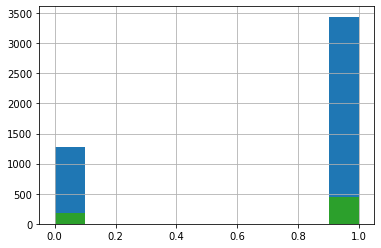

In [9]:
dftrain['label'].hist()
dfvalid['label'].hist()
dftest['label'].hist()

In [10]:
featureCol+=['label']

In [11]:
testCol=featureCol[:512]

In [12]:
len(testCol)

512

Initalization of sets according to LightGB . it is optional

In [13]:
import lightgbm as lgb
import gc
gc.collect()

dtrain = lgb.Dataset(dftrain[featureCol[:512]].values, label=dftrain['label'].values,
                      feature_name=featureCol[:512]
                      )
dvalid = lgb.Dataset(dfvalid[featureCol[:512]].values, label=dftest['label'].values,
                      feature_name=featureCol[:512],
                      )

Initial Paramets

#Random Search for Hyperparamters Tuning

In [14]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.1,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'verbose': 100,
          'num_class' : 1,
          'metric' : 'binary_error'}


Some Parameters are initalization as a population. On which we performs Random Search / Grid Search to Choose Optimal Hyperparameters

In [15]:
gridParams = {
    'learning_rate': [0.01,0.9,0.0001,0.35,0.1,0.0001,0.2,0.003,0.009,0.02],
    'n_estimators': [40,100,120,12,20,50,90,140,105],
    'num_leaves': [100,200,300,40,60,50,350,400],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65,0.9,0.7,0.85, 0.66,0.7,0.9],
    
    
    }

In [16]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'],
                         verbose=100
                        
                        )

In [17]:
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin', 'scale_pos_weight', 'verbose'])

Random Search with 100 Iteration , it takes very large time so I am commiting the code beacause we get optimal values which are below

In [18]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# gs = RandomizedSearchCV(
#     estimator=mdl, param_distributions=gridParams, 
#     n_iter=100,
#     scoring='roc_auc',
#     cv=2,
#     n_jobs=1,
#     refit=True,
#     random_state=314,
#     verbose=True)

In [19]:
# fit_params={"early_stopping_rounds":50, 
#             "eval_metric" : 'auc', 
#             "eval_set" : [dfvalid],
#             'eval_names': ['valid'],
#             #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
#             'verbose': 100,
#             'categorical_feature': 'auto'}

In [20]:
# gs.fit(dftrain[testCol], dftrain['label'])

#Train Model WIth Best Parameters Optimized by Random Search

In [21]:
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

NameError: ignored

In [22]:
bestParams=gs.best_params_

NameError: ignored

In [23]:
params={'random_state': 501, 'objective': 'binary', 'num_leaves': 100, 'n_estimators': 100, 'learning_rate': 0.2, 'colsample_bytree': 0.85, 'boosting_type': 'gbdt'}

In [24]:
mdl = lgb.LGBMClassifier(
                        boosting_type='gbdt',
          objective = 'binary',
          n_jobs = 2, # Updated from 'nthread'
          silent = True,
                     random_state=501,
                         num_leaves=100,
                         n_estimators=100,
                         learning_rate=0.2,
                         colsample_bytree=0.85,
                         
                        )

In [25]:
mdl.fit(dftrain[testCol],dftrain['label'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.85,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=2, num_leaves=100, objective='binary',
               random_state=501, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
lab=dftest['label']

In [27]:
dftest1=dftest.drop('label',axis=1)

In [28]:

y_pred=mdl.predict(dftest1)


In [29]:
# for i in range(len(y_pred)):
#     if y_pred[i]>=.4:       # setting threshold to .5
#        y_pred[i]=1
#     else:  
#        y_pred[i]=0

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lab, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,lab)

In [31]:
conf=cm
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

Precision of Model = 0.9710467706013363 Recall of Model  0.9667405764966741
F1 Score of Model = 0.9688888888888889


In [32]:
cm

array([[160,  15],
       [ 13, 436]])

In [33]:
prob=mdl.predict_proba(dftest1)

In [34]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(prob[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(lab, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9893859370028635


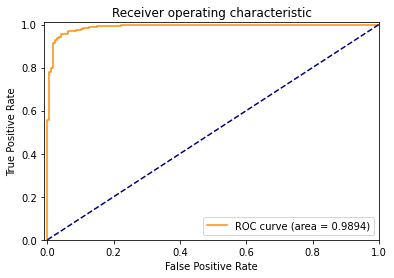

In [35]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

Learning Curves

In [37]:
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data,  annot=True,fmt='g', cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()
plot_confusion_matrix(cm, ["Normal","Pneumonia"], "LightGBMResnet18.png")